## Assignment - 2 (4th September, 2023)

### Task:
#### 1. Do a modular approach for writing a custom kNN algorithm (without library function). 
#### 2. Feature Scaling
#### 3. Calculate distance (check with every other distance)
#### 4. Finding k-Nearest neighbor
#### 5. Perform majority voting
#### 6. Evaluate model
#### 7. Perform evaluation metric and check the elbow plot (line plot) for every value of k and every value of distance metric
#### 8. Show Voronoi diagram (Purely optional)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Customers.csv")
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [3]:
n = data.isnull().sum()
print(n)

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


In [4]:
# print number of rows for each column
print(data.count())

CustomerID                2000
Gender                    2000
Age                       2000
Annual Income ($)         2000
Spending Score (1-100)    2000
Profession                1965
Work Experience           2000
Family Size               2000
dtype: int64


In [5]:
data = data.drop(['Profession'], axis=1)

In [6]:
# find the largest, average and smallest income
print(data['Annual Income ($)'].max())
print(data['Annual Income ($)'].mean())
print(data['Annual Income ($)'].min())

189974
110731.8215
0


In [7]:
# if annual income is < 110731, then it is low income. If annual income is >= 110731, then it is high income
data['Annual Income ($)'] = np.where(data['Annual Income ($)'] < 110731, '0', '1')

In [8]:
print(data['Annual Income ($)'])

0       0
1       0
2       0
3       0
4       0
       ..
1995    1
1996    0
1997    0
1998    1
1999    0
Name: Annual Income ($), Length: 2000, dtype: object


In [9]:
features = ['Age', 'Work Experience', 'Family Size']
X = data.loc[:, features].values
y = data.loc[:, 'Annual Income ($)'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, train_size=0.75)

#### Feature Scaling

In [11]:
# Using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Calculating Distance

In [12]:
# defining function to calculate distances. Here, we are using Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

#### Defining custom KNN function:
1. Calculating the distances between the test data point and all training data points
2. Storing the distances along with their respective labels.
3. Sorting the distances in ascending order.
4. Selecting the k-nearest neighbours. 
5. Counting the votes from these neighbours and returning the label with most votes.

In [13]:
# define a custom knn function
def CustomKnn(X_train_scaled, y_train, X_test_scaled, k=3):
    distances = []
    for i in range(len(X_train_scaled)):
        dist = euclidean_distance(X_test_scaled, X_train_scaled[i])
        distances.append((X_train_scaled[i], dist, y_train[i]))

    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]

    # Counting the number of votes for each class
    votes = {}
    for n in neighbors:
        label = n[2]  # Corrected indexing, directly access the label
        if label in votes:
            votes[label] += 1
        else:
            votes[label] = 1

    # Sorting to get the most votes
    sorted_votes = sorted(votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

In [16]:
# call the customKnn function
y_pred = CustomKnn(X_train_scaled, y_train, X_test_scaled, k=3)
print(y_pred)

1


In [15]:
# Check the shapes of your data
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# Make sure k is a valid value
k = 3  # Adjust if needed

# Call the CustomKnn function
prediction = CustomKnn(X_train_scaled, y_train, X_test_scaled, k)
print('Predicted value: ', prediction)


X_train_scaled shape: (1500, 3)
y_train shape: (1500,)
X_test_scaled shape: (400, 3)
Predicted value:  1


#### Metric Evaluation

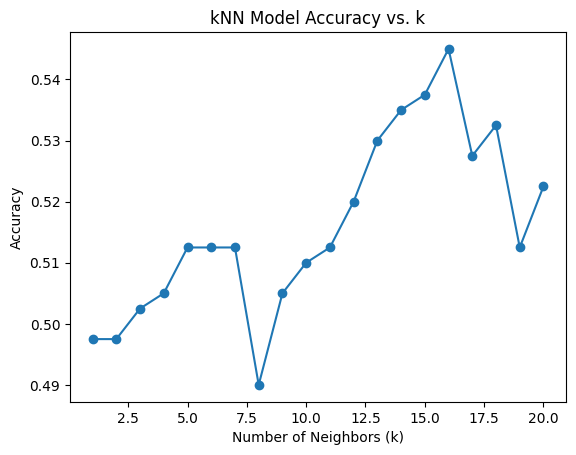

In [17]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def evaluate_knn(X_train_scaled, y_train, X_test_scaled, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = [CustomKnn(X_train_scaled, y_train, x, k) for x in X_test_scaled]
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies

k_values = range(1, 21)
accuracies = evaluate_knn(X_train_scaled, y_train, X_test_scaled, y_test, k_values)
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('kNN Model Accuracy vs. k')
plt.show()
